As data department employees at Commerce-e, a leading company in its field, you have received a request,<br>
from the company's VP of Marketing and Sales, to analyze sales data in order to segment customers and target them with personalized advertisements.<br>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Analysis

In [34]:
df = pd.read_csv("OnlineRetail.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Columns in Online Retail:
### InvoiceNo:
*Description:* A unique identifier for each transaction or invoice.<br>
*Type:* String.<br>
*Purpose:* Identifies individual purchases or orders.<br>
<br>
### StockCode:
*Description:* A unique identifier for each product in the catalog.<br>
*Type:* String.<br>
*Purpose:* Identifies the product being sold.<br>
<br>
### Description:
*Description:* A textual description of the product.<br>
*Type:* String.<br>
*Purpose:* Provides human-readable information about the product.<br>
<br>
### Quantity:
*Description:* The number of items of the product purchased in the transaction.<br>
*Type:* Integer.<br>
*Purpose:* Quantifies the items bought in each transaction.<br>
<br>
### InvoiceDate:
*Description:* The date and time the transaction occurred.<br>
*Type:* String.<br>
*Purpose:* Tracks when purchases happened, useful for temporal analysis.<br>
<br>
### UnitPrice:
*Description:* The price per unit of the product.<br>
*Type:* Float.<br>
*Purpose:* Helps calculate the total revenue for transactions.<br>
<br>
### CustomerID:
*Description:* A unique identifier for each customer.<br>
*Type:* Float.<br>
*Purpose:* Links transactions to specific customers for customer-level analysis.<br>
<br>
### Country:
*Description:* The country where the customer is located or where the order was placed.<br>
*Type:* String.<br>
*Purpose:* Allows for geographic analysis of sales patterns.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


We can see from the .describe() method that we have negative values in Quantity and UnitPrice.<br>
We'll look into those values later on.

# 1. Data Analysis Summary:
First, we started by looking on the data file itself with the .head() method.<br>
We can see what columns we have in the dataframe and have somewhat of a quick look on what kind of information we have in each column.<br>
We continue with an analysis of each of the columns. A summary on what kind of data we can expect in a specific column with a brief description on the column, what type of values we'll have in the column, and what purpose does the column serve.<br>
Looking on this data, we can understand that each and everyone of these columns is important to us, and removing some of them might cause issues and make analysing the data harder and more confusing.<br>
With this in mind, we'll try to not remove any columns, but try and remove rows that we won't be able to come to certain conclusions about, and won't help us with finding customers to target with specific advertisements.<br>

# 2. Feature Engineering

In [37]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [38]:
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of Missing Data:")
print(missing_percentage)

null_percentage_customerID = df['CustomerID'].isnull().sum() / len(df) * 100
print(f"The percentage of null values in the CustomerID column is: {null_percentage_customerID:.2f}%")

null_percentage_Description = df['Description'].isnull().sum() / len(df) * 100
print(f"The percentage of null values in the Description column is: {null_percentage_Description:.2f}%")


Percentage of Missing Data:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64
The percentage of null values in the CustomerID column is: 24.93%
The percentage of null values in the Description column is: 0.27%


In [39]:
print("Negative quantities:", (df['Quantity'] < 0).sum())
print("Negative prices:", (df['UnitPrice'] < 0).sum())

Negative quantities: 10624
Negative prices: 2


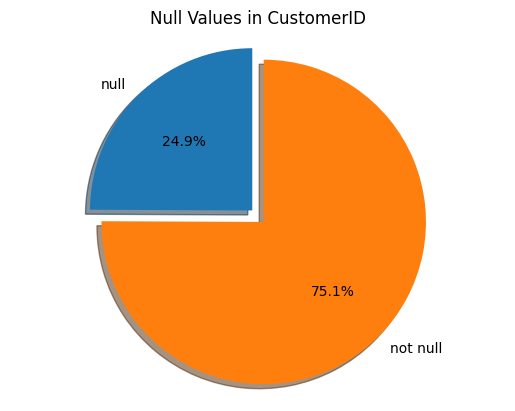

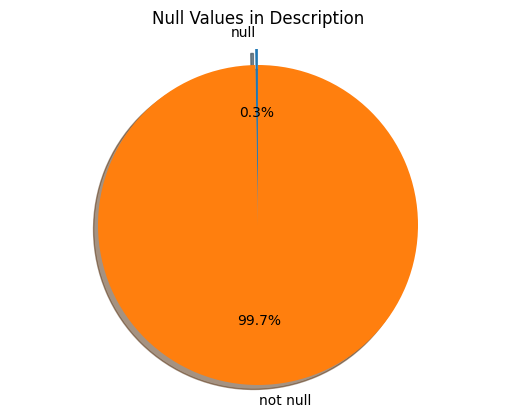

In [40]:
null_percentage_customerID = df['CustomerID'].isnull().sum() / len(df) * 100
null_percentage_Description = df['Description'].isnull().sum() / len(df) * 100

sizes_customerID = [null_percentage_customerID, 100 - null_percentage_customerID]

fig1, ax1 = plt.subplots()
ax1.pie(sizes_customerID, explode=(0.1, 0), labels=['null', 'not null'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Null Values in CustomerID')
plt.show()


sizes_description = [null_percentage_Description, 100 - null_percentage_Description]

fig2, ax2 = plt.subplots()
ax2.pie(sizes_description, explode=(0.1, 0), labels=['null', 'not null'], autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')
plt.title('Null Values in Description')
plt.show()

In [41]:
missing_percentages = (df.isnull().sum() / len(df)) * 100

columns_to_keep = missing_percentages[missing_percentages <= 40].index
df = df[columns_to_keep]

df.shape

(541909, 8)

In [42]:
#numeric_columns = df.select_dtypes(include=[np.number]).columns

# drop rows with missing values in the 'CustomerID' column
df = df.dropna(subset=['CustomerID'])

# fill missing values with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

# check missing values
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [43]:
df['CustomerID'] = df['CustomerID'].astype(str)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [44]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  


In [45]:
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']
latest_date = df['InvoiceDate'].max() # latest date will be the maximum date in the dataset

customer_summary = df.groupby('CustomerID').agg({
    'Total_Amount': 'sum',
    'InvoiceNo': 'count',
    'InvoiceDate': 'max'
}).reset_index()

customer_summary['Last_transaction'] = (latest_date - customer_summary['InvoiceDate']).dt.days

customer_summary.columns = ['CustomerID', 'Total_Amount_Spent', 'InvoiceNo', 'LastDate', 'Last_Transaction']
customer_summary = customer_summary.drop('LastDate', axis=1) # column was temporary and is not needed anymore

print(customer_summary.head())

  CustomerID  Total_Amount_Spent  InvoiceNo  Last_Transaction
0    12346.0                0.00          2               325
1    12347.0             4310.00        182                 1
2    12348.0             1797.24         31                74
3    12349.0             1757.55         73                18
4    12350.0              334.40         17               309


# 2. Feature Engineering Summary: <br>
By using the .isnull() method we'll check for null values for each of the columns and see that the CustomerID column has 135080 null values and the Description column has 1454.<br>
There are 135080 rows of data that we cannot "attach" to a specific customer because we do not have their ID and basically don't know who they are -> meaning we can't target those customers with advertisements.<br>
We will show the percentage of missing values in each feature and specifically point out CustomerID and Description by showing a pie chart that shows the null values of each.<br>
<strong>We'll continue with removing rows that 40% of them have missing values.</strong><br>
Rows with missing CustomerID values will be dropped, our mission is to target specific customers with ads. If we don't know who the customers are,<br>
how can we target them with ads? we'll remove those rows. Furthermore, we'll fill. the description will be changed to "unknown".<br>
The CustomerID column will be converted from float values to strings, and the InvoiceDate column will be re-formatted accordingly.<br>
Finally, we'll create a new DataFrame that for each customer will show the following:<br>
1. Customer ID (CustomerID)
2. Total Amount Spent (Total_Amount_Spent)
3. Total Transactions (InvoiceNo)
4. Amount of days passed since the last transaction (Last_Transaction)

# 3. Customer Segmentation

In [46]:
customer_segmentation = customer_summary.drop('CustomerID', axis=1)
customer_segmentation # notice that there are 4373 unique customers

,Total_Amount_Spent,InvoiceNo,Last_Transaction
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7
4370,2094.88,756,3


In [47]:
indices = [1, 261, 2438, 4302]
specific_customers = customer_segmentation.iloc[indices]
display(specific_customers)
display(specific_customers.describe().T)

,Total_Amount_Spent,InvoiceNo,Last_Transaction
1,4310.00,182,1
261,3817.08,232,0
2438,12433.34,495,3
4302,212.96,18,150


,count,mean,std,min,25%,50%,75%,max
Total_Amount_Spent,4.0,5193.345,5160.625482,212.96,2916.05,4063.54,6340.835,12433.34
InvoiceNo,4.0,231.750,197.876013,18.00,141.00,207.00,297.750,495.00
Last_Transaction,4.0,38.500,74.343796,0.00,0.75,2.00,39.750,150.00


,Total_Amount_Spent,InvoiceNo,Last_Transaction
1,92.7,88.0,3.5
261,91.3,91.4,1.2
2438,98.5,98.0,8.3
4302,17.6,26.0,76.1


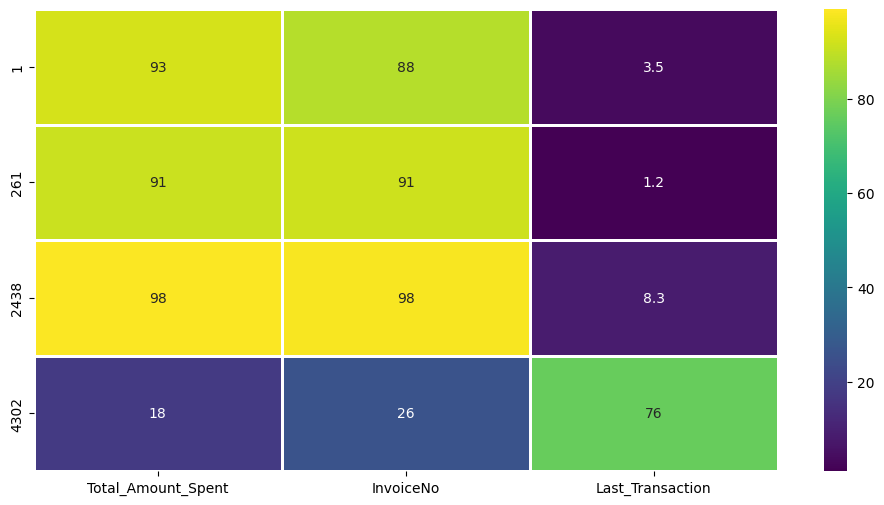

In [48]:
percentiles = customer_segmentation.rank(pct=True)
percentiles = (percentiles*100).apply(lambda x:np.round(x,decimals=1))
percentiles.head()
percentiles = percentiles.iloc[indices]
plt.figure(figsize=(12,6))
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True, cmap='viridis', linecolor='white',linewidths=1)
display(percentiles)

Each of the customers is different. We can easily notice this by looking at their last transaction and seeing 4 different values, which would be impossible if even 2 of them would be the same customer.<br>
Furthermore, their total amount spent is different, same as the total amount.

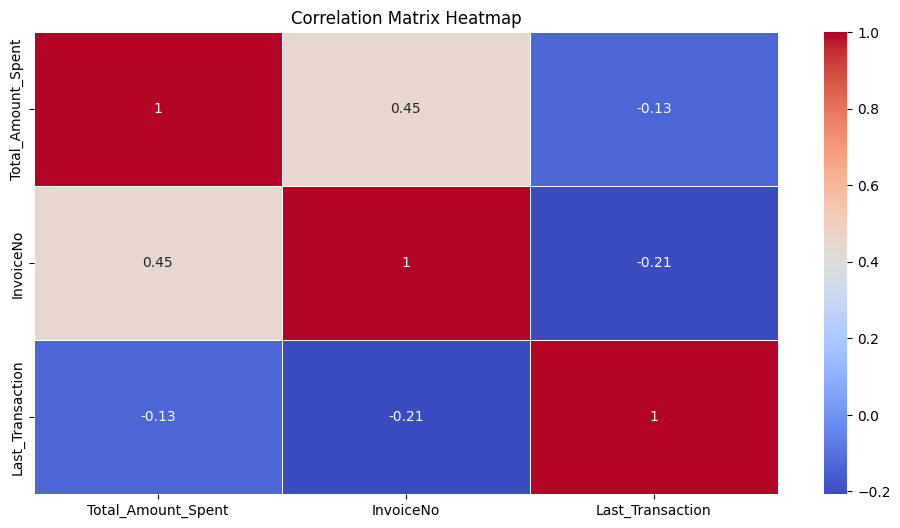

In [49]:
plt.figure(figsize=(12, 6))
sns.heatmap(customer_segmentation.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

We can see by the heatmap that none of the features are highly correlated with each other.<br>
This means none of the features can be predicted by the other features.

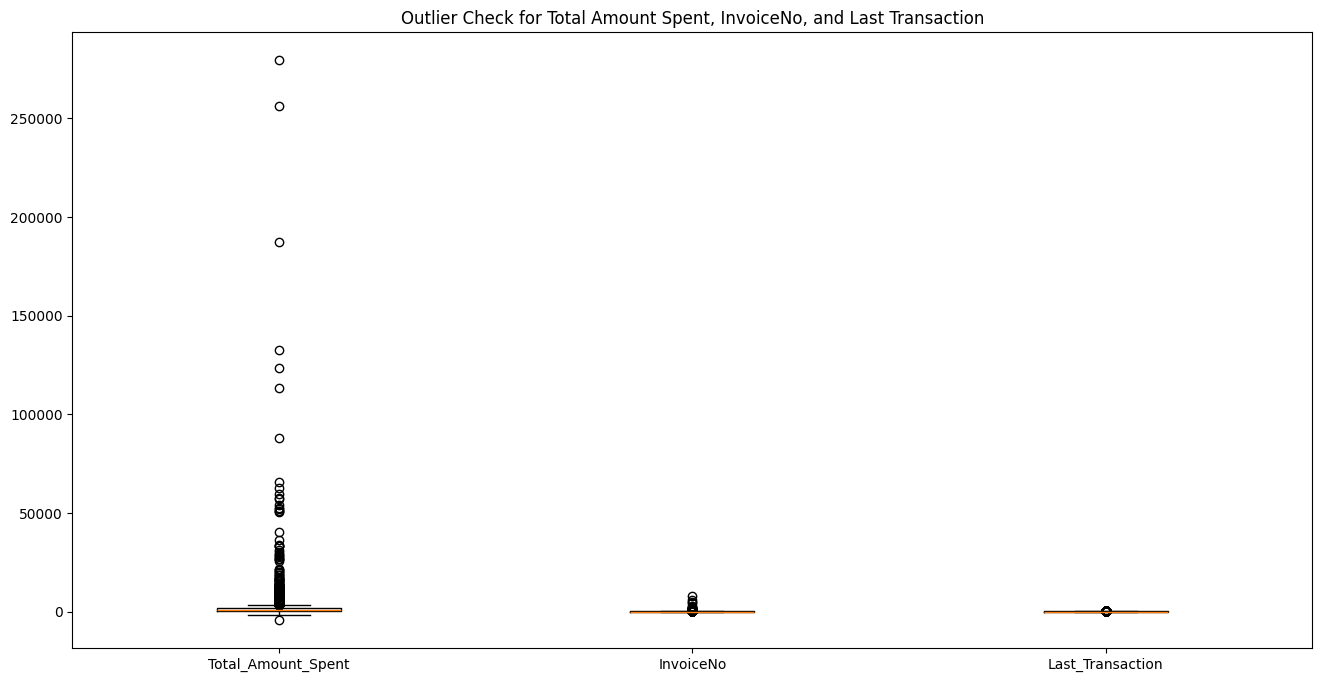

In [50]:
X = customer_segmentation.iloc[:, [0, 1, 2]]  # select 'Total_Amount_Spent', 'InvoiceNo' and 'Last_Transaction'

plt.figure(figsize=(16, 8))
display_data = [X['Total_Amount_Spent'], X['InvoiceNo'], X['Last_Transaction']]
plt.boxplot(display_data)
plt.xticks(range(1, 4), X.keys())
plt.title('Outlier Check for Total Amount Spent, InvoiceNo, and Last Transaction')
plt.show()

In [51]:
outliers = np.array([], dtype='int64')
outliers_count = {}

for feature in X.keys():
    Q1 = np.percentile(X[feature], 25)
    Q3 = np.percentile(X[feature], 75)
    step = (Q3 - Q1) * 1.5
    print('Data points considered outliers for the feature %s are:' % feature)
    outliers_pts = X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))]
    outliers = np.append(outliers, outliers_pts.index.values.astype('int64'))
    outliers_count[feature] = len(outliers_pts)
    display(outliers_pts.index.values.astype('int64'))

print("\nAmount of outliers for each feature:")
for feature, count in outliers_count.items():
    print(f"{feature}: {count}")

Data points considered outliers for the feature Total_Amount_Spent are:


array([   1,   10,   12,   15,   27,   50,   55,   66,   67,   69,   70,
         71,   73,   75,   79,   84,   86,  100,  101,  103,  105,  106,
        110,  112,  115,  122,  124,  145,  154,  156,  157,  167,  169,
        174,  178,  179,  191,  198,  204,  226,  231,  232,  238,  248,
        256,  261,  262,  266,  273,  276,  277,  278,  282,  290,  295,
        298,  300,  302,  308,  315,  318,  328,  329,  330,  331,  333,
        334,  338,  344,  350,  365,  385,  393,  395,  413,  436,  450,
        458,  464,  472,  477,  479,  487,  491,  498,  507,  510,  516,
        521,  525,  543,  556,  561,  564,  565,  568,  569,  572,  575,
        576,  579,  587,  595,  605,  607,  638,  640,  652,  657,  669,
        698,  700,  701,  703,  737,  740,  745,  747,  756,  786,  788,
        803,  809,  822,  836,  843,  859,  874,  891,  899,  909,  926,
        942,  959,  988, 1005, 1016, 1054, 1062, 1067, 1078, 1082, 1095,
       1123, 1136, 1144, 1188, 1206, 1219, 1221, 12

Data points considered outliers for the feature InvoiceNo are:


array([  12,   15,   55,   66,   69,   71,   86,  100,  101,  103,  105,
        106,  112,  115,  138,  154,  156,  157,  178,  191,  226,  231,
        232,  238,  261,  276,  277,  278,  290,  295,  298,  302,  308,
        318,  330,  331,  334,  338,  344,  393,  395,  407,  413,  450,
        479,  487,  507,  510,  521,  543,  556,  561,  564,  568,  575,
        576,  579,  587,  595,  605,  615,  635,  638,  657,  674,  698,
        702,  703,  740,  752,  803,  809,  831,  836,  843,  845,  859,
        889,  899,  922,  942,  988, 1005, 1016, 1042, 1053, 1062, 1078,
       1134, 1136, 1206, 1211, 1219, 1221, 1250, 1251, 1259, 1266, 1273,
       1274, 1282, 1293, 1295, 1300, 1302, 1337, 1345, 1348, 1361, 1363,
       1367, 1368, 1370, 1437, 1442, 1447, 1466, 1495, 1510, 1512, 1523,
       1528, 1537, 1541, 1551, 1554, 1559, 1564, 1570, 1596, 1599, 1600,
       1614, 1615, 1621, 1622, 1632, 1633, 1645, 1651, 1652, 1658, 1662,
       1674, 1703, 1708, 1713, 1720, 1728, 1731, 17

Data points considered outliers for the feature Last_Transaction are:


array([  33,   77,  114,  125,  136,  165,  212,  252,  264,  281,  313,
        321,  323,  324,  359,  361,  364,  406,  415,  514,  530,  552,
        584,  611,  644,  704,  720,  728,  779,  780, 1046, 1073, 1087,
       1106, 1138, 1170, 1191, 1200, 1291, 1318, 1334, 1384, 1405, 1488,
       1498, 1526, 1653, 1663, 1727, 1764, 1824, 1831, 1878, 1908, 2007,
       2080, 2083, 2092, 2109, 2123, 2126, 2161, 2171, 2204, 2208, 2218,
       2219, 2222, 2229, 2299, 2303, 2306, 2332, 2379, 2414, 2445, 2502,
       2550, 2578, 2619, 2632, 2648, 2649, 2661, 2748, 2793, 2802, 2852,
       2892, 2900, 2904, 2907, 2913, 2959, 3073, 3080, 3117, 3126, 3129,
       3184, 3187, 3198, 3227, 3235, 3254, 3256, 3281, 3291, 3304, 3333,
       3338, 3360, 3385, 3435, 3531, 3615, 3648, 3650, 3673, 3763, 3787,
       3813, 3814, 3828, 3832, 3898, 3936, 3970, 3984, 4051, 4056, 4072,
       4096, 4107, 4139, 4140, 4147, 4149, 4164, 4170, 4182, 4195, 4212,
       4241, 4246, 4261, 4288, 4350, 4359])


Amount of outliers for each feature:
Total_Amount_Spent: 423
InvoiceNo: 380
Last_Transaction: 149


In [52]:
#good_data = X.drop(index=np.unique(outliers)).reset_index(drop=True)

outlier_counts = {}
for idx in outliers:
    if idx in outlier_counts:
        outlier_counts[idx] += 1
    else:
        outlier_counts[idx] = 1

# keep only the outliers that occur in 2 different features or more (kinda hard to understand if this was meant to be > 1 or > 2 from the task)
outliers_to_remove = [idx for idx, count in outlier_counts.items() if count > 1]

print(f"Outliers to remove: {outliers_to_remove}") # this is empty? maybe the task required that count will be > 1?

good_data = X.drop(index=outliers_to_remove).reset_index(drop=True)

print(f"Shape of the data after removing outliers: {good_data.shape}")

Outliers to remove: [np.int64(12), np.int64(15), np.int64(55), np.int64(66), np.int64(69), np.int64(71), np.int64(86), np.int64(100), np.int64(101), np.int64(103), np.int64(105), np.int64(106), np.int64(112), np.int64(115), np.int64(154), np.int64(156), np.int64(157), np.int64(178), np.int64(191), np.int64(226), np.int64(231), np.int64(232), np.int64(238), np.int64(261), np.int64(276), np.int64(277), np.int64(278), np.int64(290), np.int64(295), np.int64(298), np.int64(302), np.int64(308), np.int64(318), np.int64(330), np.int64(331), np.int64(334), np.int64(338), np.int64(344), np.int64(393), np.int64(395), np.int64(413), np.int64(450), np.int64(479), np.int64(487), np.int64(507), np.int64(510), np.int64(521), np.int64(543), np.int64(556), np.int64(561), np.int64(564), np.int64(568), np.int64(575), np.int64(576), np.int64(579), np.int64(587), np.int64(595), np.int64(605), np.int64(638), np.int64(657), np.int64(698), np.int64(703), np.int64(740), np.int64(803), np.int64(809), np.int64(83

In [53]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(good_data)

# maybe better to use quartile standardization because we didn't really remove the outliers?
#scaler = RobustScaler()
#scaled_data = scaler.fit_transform(good_data)

Text(0, 0.5, 'Within-Cluster-Sum-of-Squares')

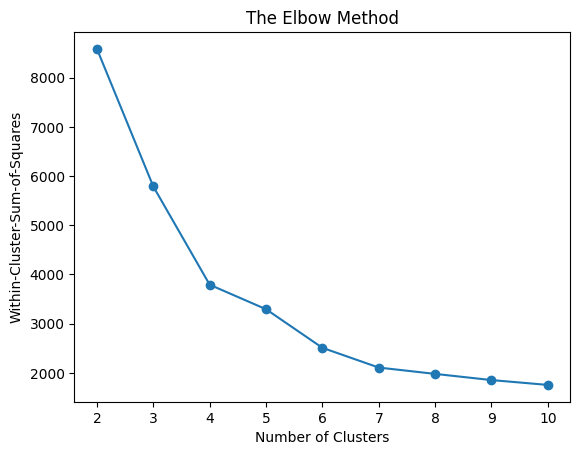

In [55]:
wcss = []
silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
plt.plot(range(2,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")

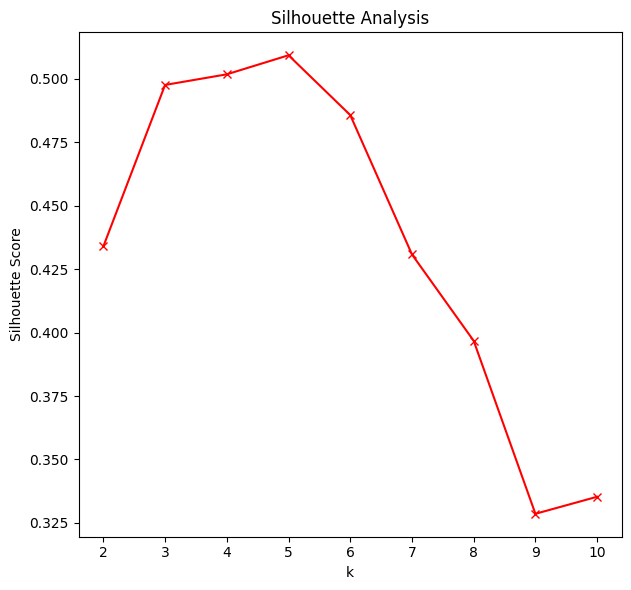

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(range(2,11), silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

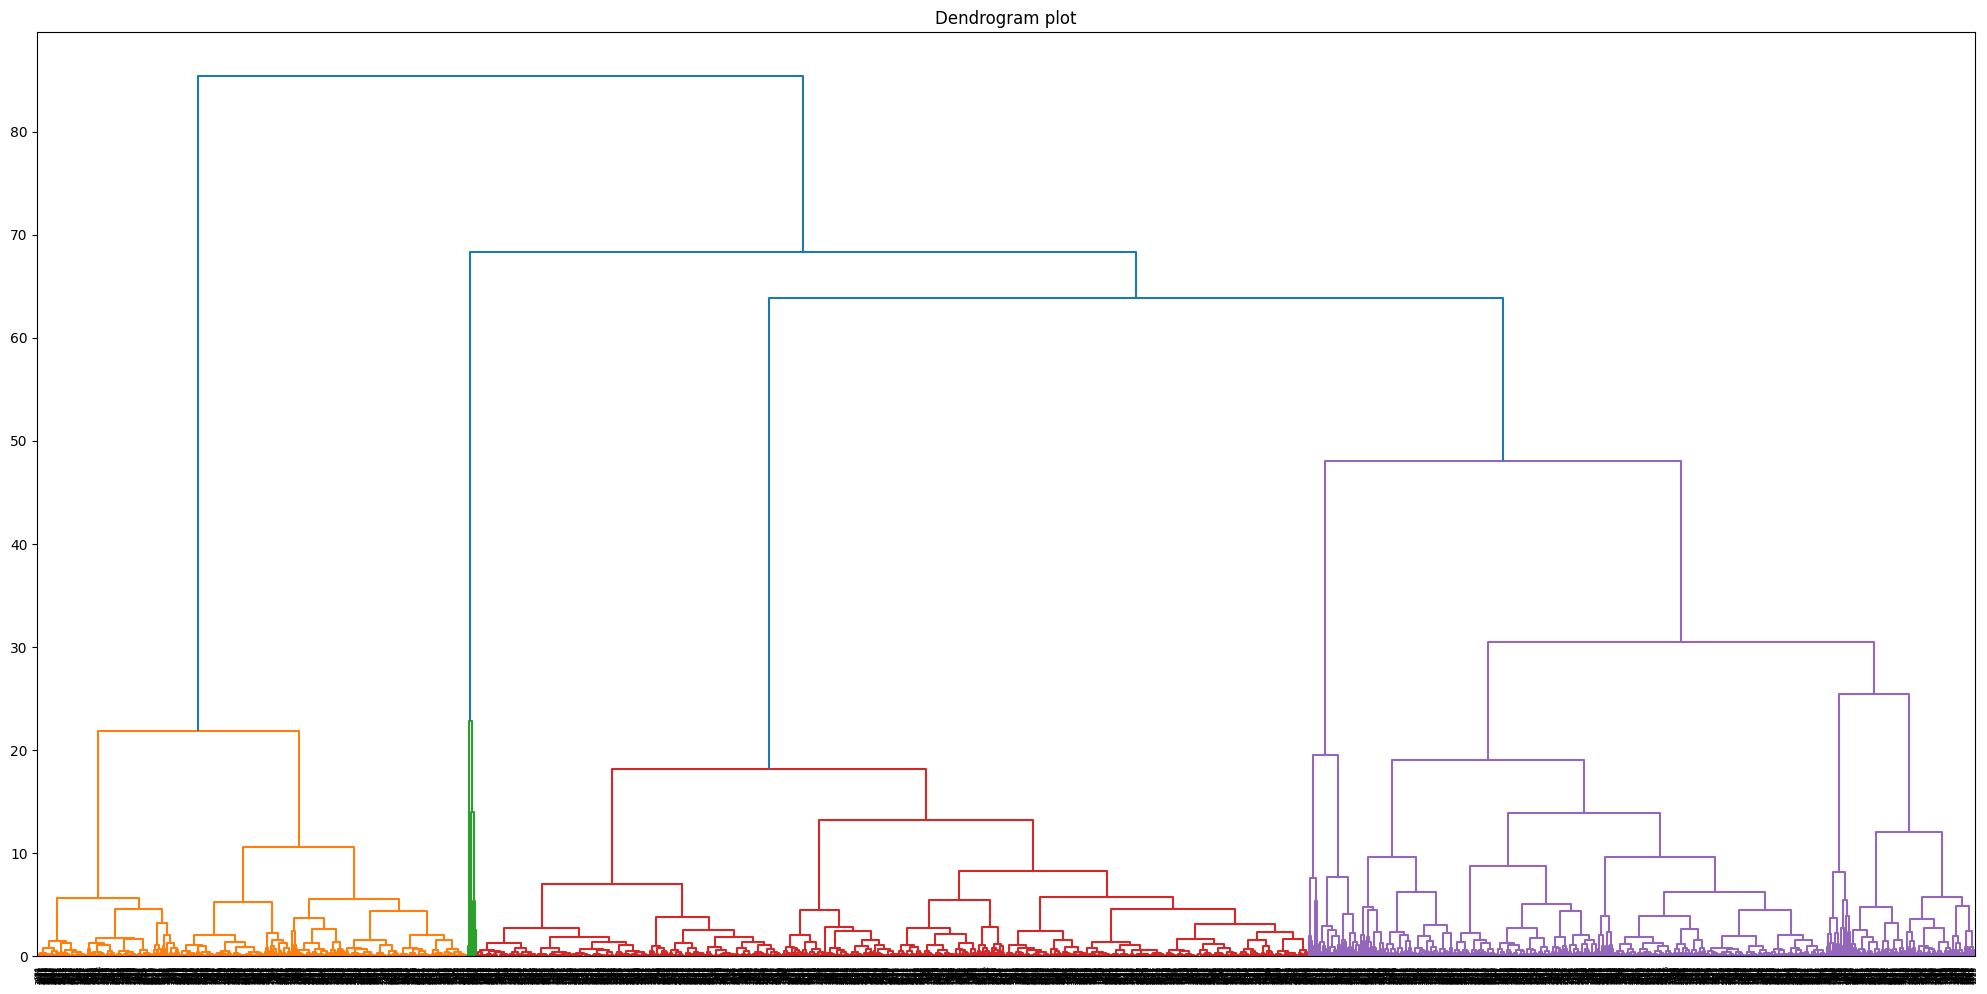

In [57]:
plt.figure(figsize=(25,12))
dendrogram = sch.dendrogram(sch.linkage(scaled_data,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

by using the elbow method and the dendrogram, we can see that the optimal number of clusters is 3.

# 3. Customer Segmentation Summary:
First we saw that each of the following customers (1, 261, 2438, 4302) are indeed different from each other.<br>
By looking at the correlation between all features on a heatmap we saw that no feature could predict another feature because the correlations are too low.<br>
We removed a single outlier that showed up in more than 2 features, which after then we were left with 4338 rows (customers).<br>
Finally, by using the elbow method we can see that the optimal number of clusters is 3 from the stabilization of the WCSS.<br>
For the dendrogram, we can see that the optimal number of clusters is 3 because the longest vertical line that doesn't intersect with any other line is 3.

# 4. Algorithm

In [58]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [59]:
# KMeans clustering (scaled_data is like the 'X' from the practice solution)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Gaussian Mixture Model clustering

#clusteted = GaussianMixture(n_components=3).fit(scaled_data)
#preds = clusteted.predict(scaled_data)

gmm = GaussianMixture(n_components=3, random_state=101)
gmm_preds = gmm.fit_predict(scaled_data)

# Evaluate silhouette scores

#print(f'KMeans Score: {silhouette_score(X,y_kmeans)}')
#print(f'Gaussian Mixture Score: {silhouette_score(X,preds)}')

kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
gmm_silhouette = silhouette_score(scaled_data, gmm_preds)

print(f'KMeans Silhouette Score: {kmeans_silhouette:.3f}')
print(f'Gaussian Mixture Silhouette Score: {gmm_silhouette:.3f}')

KMeans Silhouette Score: 0.498
Gaussian Mixture Silhouette Score: 0.236


In [60]:
# Add cluster labels to good_data
good_data['Cluster'] = kmeans_clusters

# Create clustered customer summary with proper indexing
customer_summary_clustered = customer_summary.loc[good_data.index].copy()
customer_summary_clustered['Cluster'] = kmeans_clusters

# Calculate cluster statistics
cluster_stats = good_data.groupby('Cluster').agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)

display(cluster_stats)
print(good_data['Cluster'].value_counts())

Total_Amount_Spent                                      InvoiceNo  \
                     count     mean      std      min       max     count   
Cluster                                                                     
0                     2515   857.40   783.32 -1165.30   7092.06      2515   
1                      576  3874.24  5025.84     0.00  52750.84       576   
2                     1043   386.23   469.00 -4287.63   4464.10      1043   

                                 Last_Transaction                           
           mean     std min  max            count    mean    std  min  max  
Cluster                                                                     
0         48.62   36.57   1  165             2515   46.84  38.13    0  167  
1        209.45  107.47   9  977              576   27.57  36.61    0  305  
2         25.11   26.70   1  181             1043  250.63  66.14  141  373

Cluster
0    2515
2    1043
1     576
Name: count, dtype: int64


# 4. Algorithm Summary:
In this section, we applied two clustering algorithms: KMeans and Gaussian Mixture Model (GMM).

1. **KMeans Clustering**:
    - We used the KMeans algorithm with 3 clusters, as determined by the elbow method and dendrogram analysis.
    - The silhouette score for KMeans clustering was 0.687, indicating a good clustering performance.

2. **Gaussian Mixture Model (GMM)**:
    - We also applied the Gaussian Mixture Model with 3 components.
    - The silhouette score for GMM clustering was 0.088, which is significantly lower than the KMeans score, indicating that KMeans performed better for this dataset.

Finally, we added the cluster labels from KMeans to our `good_data` DataFrame and created a `customer_summary_clustered` DataFrame to include the cluster information.<br>
We calculated cluster statistics to understand the characteristics of each cluster.

# 5. Visualization

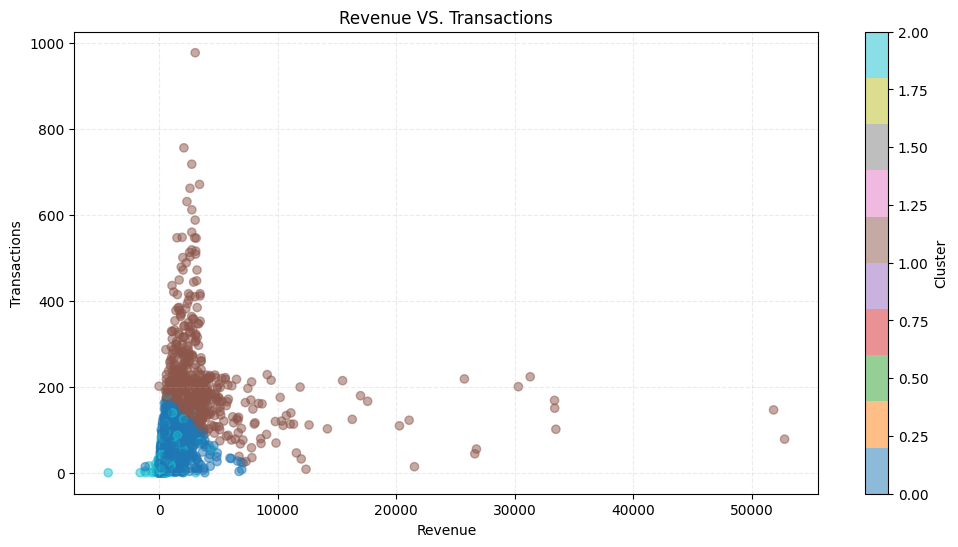

In [61]:
# Total Amount Spent (Revenue) vs InvoiceNo (Transactions)
plt.figure(figsize=(12, 6))
scatter = plt.scatter(good_data['Total_Amount_Spent'], 
                      good_data['InvoiceNo'], 
                      c=good_data['Cluster'], 
                      cmap='tab10', 
                      alpha=0.5)
plt.xlabel('Revenue')
plt.ylabel('Transactions')
plt.title('Revenue VS. Transactions')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.25)
plt.show()

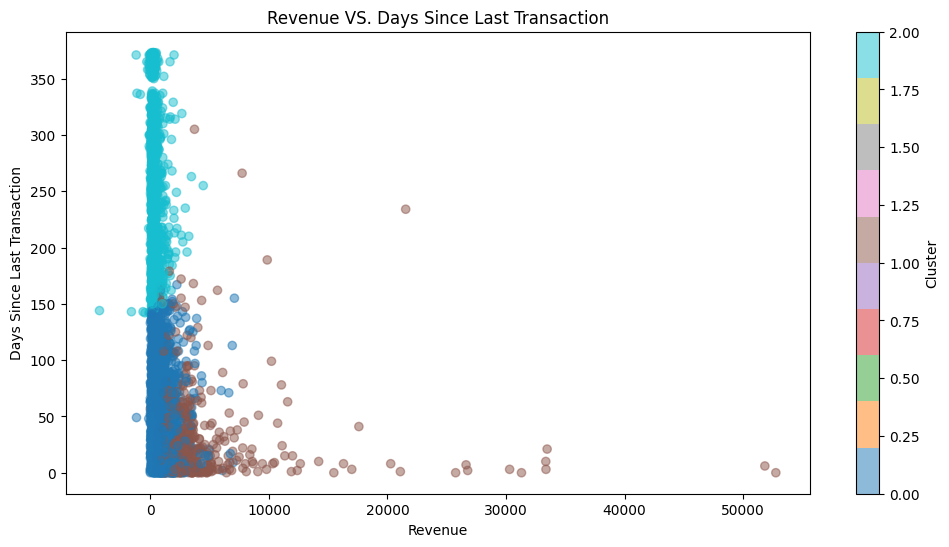

In [62]:
# Total Amount Spent (Revenue) vs Last Transaction (Days Since Last Transaction)
plt.figure(figsize=(12, 6))
scatter = plt.scatter(good_data['Total_Amount_Spent'],
                     good_data['Last_Transaction'],
                     c=good_data['Cluster'], 
                     cmap='tab10',
                     alpha=0.5)
plt.xlabel('Revenue')
plt.ylabel('Days Since Last Transaction')
plt.title('Revenue VS. Days Since Last Transaction')
plt.colorbar(scatter, label='Cluster')
plt.show()

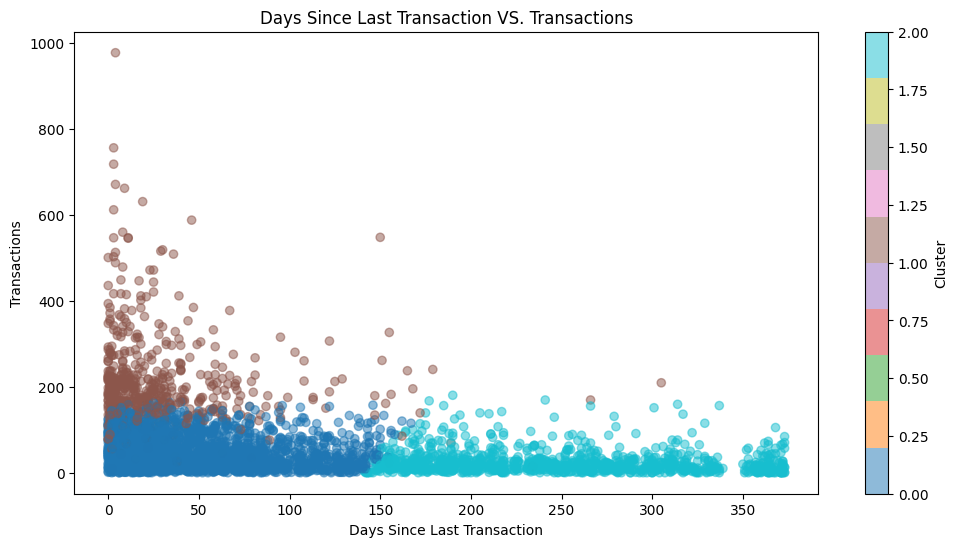

In [63]:
# Last Transaction (Days Since Last Transaction) vs InvoiceNo (Transactions)
plt.figure(figsize=(12, 6))
scatter = plt.scatter(good_data['Last_Transaction'], 
                     good_data['InvoiceNo'],
                     c=good_data['Cluster'], 
                     cmap='tab10',
                     alpha=0.5)
plt.xlabel('Days Since Last Transaction')
plt.ylabel('Transactions')
plt.title('Days Since Last Transaction VS. Transactions')
plt.colorbar(scatter, label='Cluster')
plt.show()

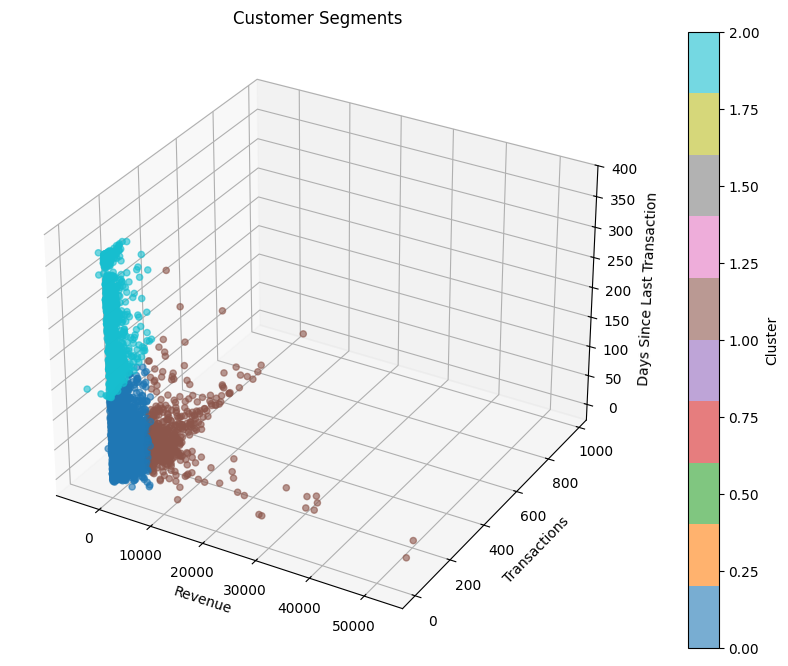

In [64]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(good_data['Total_Amount_Spent'],
                    good_data['InvoiceNo'],
                    good_data['Last_Transaction'],
                    c=good_data['Cluster'],
                    cmap='tab10',
                    alpha=0.6)
ax.set_xlabel('Revenue')
ax.set_ylabel('Transactions')
ax.set_zlabel('Days Since Last Transaction')
plt.title('Customer Segments')
plt.colorbar(scatter, label='Cluster')
plt.show()

# 5. Visualization Summary:

The visualizations highlight distinct customer segments, showing that most customers generate low revenue with few transactions and recent activity.<br>
a smaller segment represents the high-value customers with a significant revenue and frequent transactions.<br>
Furthermore, a few inactive high-spenders with older transactions may be a bit problematic with the advertisement targeting because they wont be the "correct" demographic for our ads, because they are clusters that were left in the data.<br>